In [1]:
# numpy: numerical library
from math import *
from numpy import *
from scipy import *
import numpy.random as nprandom
# pylab: matplotlib's matlab-like interface

from pylab import *

# Works nicely with python2.5 and beyond.

In [2]:
# The data we will fit:
#  x, y, sigma_y
data1 = array([[201,592,61],[244,401,25],[47,583,38],[287,402,15],[203,495,21],
			   [58,173,15],[210,479,27],[202,504,14],[198,510,30],[158,416,16],
			   [165,393,14],[201,442,25],[157,317,52],[131,311,16],[166,400,34],
			   [160,337,31],[186,423,42],[125,334,26],[218,533,16],[146,344,22]])

# plotting limits
xlimits = [0,250]
ylimits = [100,600]
title_prefix = 'Problem set 1'
plot_format = '.png'

In [3]:
def get_data_no_outliers():
	# pull out the x, y, and sigma_y columns, which have been packed into the
	# "data1" matrix.  "data1" has shape (20,3).  ":" means "everything in
	# that dimension".  Some of the first 5 points are outliers so for this
	# part we only grab from index 5 on, with magic "5:"
	x = data1[5:,0]
	y = data1[5:,1]
	sigmay = data1[5:,2]
	return (x, y, sigmay)

# INCLUDING THE OUTLIERS WILL HELP TO BETTER GRASP DIFFERENCE BETWEEN PROCEDURES/RECIPES AND GENUINE OPTIMIZATION
# ALSO WILL SHOW HOW TYPICALLY WE OVERCOME TROUBLE IN MODELLING WHEN WORKING EITHER IN FREQUENTIST OR IN BAYESIAN FRAMEWORK

In [4]:
# Plot data with error bars, standard axis limits, etc.
def plot_yerr(x, y, sigmay):
	# plot data with error bars
	errorbar(x, y, yerr=sigmay, fmt='.', ms=7, lw=1, color='k')
	# if you put '$' in you can make Latex labels
	xlabel('$x$')
	ylabel('$y$')
	xlim(*xlimits)
	ylim(*ylimits)
	title(title_prefix)

In [5]:
# Plot a   y = mx + b  line.
def plot_line(b, m):
	x = array(xlimits)
	y = b + m*x
	plot(x, y, 'k-', alpha=0.5)
	xlim(*xlimits)
	ylim(*ylimits)

In [6]:
# Function containing code for Problem 1.
def problem1():
    (x, y, sigmay) = get_data_no_outliers()
    # clear the figure
    clf()    
    # plot the data points...
    plot_yerr(x, y, sigmay)
    # save just the data points plot.
    savefig('p1-data' + plot_format)
    # find the weighted least-squares solution (using the error bars).
    #(m, b, param_err_mat) = problem1_wls(x, y, sigmay)
    (m, b) = problem1_wls(x, y, sigmay)
    # clear the figure
    clf()
    # re-plot the data points
    plot_yerr(x, y, sigmay)
    # plot the straight line that best fits the dataset
    #plot_line(m, b)
    show()
    plot_yerr(x, y, sigmay)
    plot_line(b, m)	
    title(title_prefix + ': Weighted Least Squares')
    savefig('p1-wls' + plot_format)
    show()
    

In [7]:
# Weighted least squares method: A reformulation of Frequentist Optimization (Maximization of Likelihood)
# Returns best-fit (m, b)
def problem1_wls(x, y, sigmay):
    print('WLS')
    # Weighted least squares.
    N = len(x)
    # build the inverse covariance matrix
    Cinv = diag(1./sigmay**2)
    # build the "X" matrix
    X = zeros((N,2))
    # Building the design matrix A for a trivial linear least squares scheme as in numerical recipes
    X[:,0] = x # 1.
    X[:,1] = 1. # x
    print('X shape:'), X.shape
    # hint: what do you think XT*Cinv*X = AT*Cinv*A = \alpha = inverse of covariance matrix of parameters has to do with the uncertainties on (m,b)?
    XTCinvX = dot(dot(X.T, Cinv), X)
    print('XTCinvX shape:', XTCinvX.shape)
    XTCinvy = dot(dot(X.T, Cinv), y)
    print('XTCinvy shape:', XTCinvy.shape)
    beta = dot(inv(XTCinvX), XTCinvy)
    print('beta', beta)
    print
    (m, b) = beta
    #err_matrix= inv(transpose(XTCinvX))
    #err_matrix2= inv(XTCinvX)
    #print('err_matrix1,2', err_matrix, err_matrix2)
    return (m, b)
    #return (m, b,err_matrix)


In [8]:
#def straight_line_gaussian_likelihood(x, y, sigmay, m, b):
# This you will have to write yourself for our basic MCMC for fitting a straight line.
# This is where you compute the likelihood FIRST


In [9]:
#def problem2():
#Your Metrpolis-Hastings algorithm here.
#It should call straight_line_gaussian_likelihood(x, y, sigmay, m, b)



WLS
X shape:
XTCinvX shape: (2, 2)
XTCinvy shape: (2,)
beta [ 2.23253622 34.84594131]


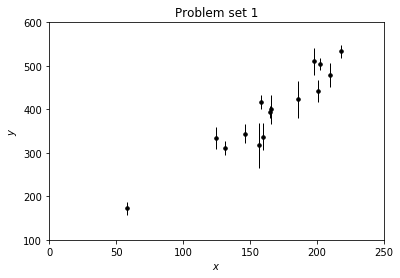

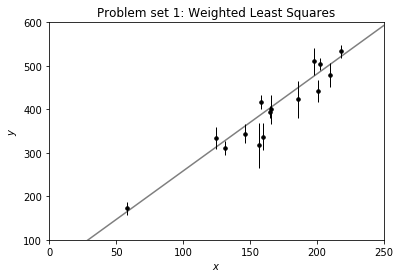

In [10]:
# This block executes when you run "python wrapper.py" in command line from terminal.
if __name__ == '__main__':
	problem1() # Check that this works
	# uncomment this when you are ready to do problem 2.
    #problem2()